In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

from keras import backend as K
from keras.models import Sequential
from keras.layers import  Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical


from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from PIL import Image


Using TensorFlow backend.


In [2]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C:\\Users\ideapad GAMIN\DL\\Flower_CNN\\flowers\\daisy'
FLOWER_SUNFLOWER_DIR='C:\\Users\ideapad GAMIN\DL\\Flower_CNN\\flowers\\sunflower'
FLOWER_TULIP_DIR='C:\\Users\\ideapad GAMIN\DL\\Flower_CNN\\flowers\\tulip'
FLOWER_DANDI_DIR='C:\\Users\\ideapad GAMIN\\DL\\Flower_CNN\\flowers\dandelion'
FLOWER_ROSE_DIR='C:\\Users\\ideapad GAMIN\DL\\Flower_CNN\\flowers\\rose'

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [4]:
def make_train_data(flower_type,DIR):
#     print(os.listdir(DIR))
    for img in tqdm(os.listdir(DIR)):
#         print('a')
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
#         print(path)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
#         print(img)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('Daisy',FLOWER_DAISY_DIR)


100%|███████████████████████████████████████████████████████████████████████████████| 764/764 [00:03<00:00, 231.82it/s]


In [6]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 733/733 [00:03<00:00, 207.79it/s]


In [7]:
make_train_data('TULIP',FLOWER_TULIP_DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:04<00:00, 239.48it/s]


In [8]:
make_train_data('Rose',FLOWER_ROSE_DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:03<00:00, 243.63it/s]


In [9]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:04<00:00, 221.81it/s]


In [10]:
X

[array([[[134, 136, 136],
         [143, 144, 144],
         [147, 147, 147],
         ...,
         [150, 152, 152],
         [152, 154, 154],
         [152, 152, 152]],
 
        [[132, 134, 134],
         [142, 143, 143],
         [146, 146, 146],
         ...,
         [150, 152, 152],
         [151, 153, 153],
         [151, 151, 151]],
 
        [[131, 134, 134],
         [139, 141, 142],
         [145, 144, 146],
         ...,
         [152, 154, 154],
         [150, 151, 151],
         [147, 147, 147]],
 
        ...,
 
        [[ 26,  47,  44],
         [ 25,  46,  43],
         [ 26,  47,  44],
         ...,
         [125, 126, 130],
         [124, 125, 129],
         [125, 126, 130]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 27,  48,  45],
         ...,
         [127, 127, 131],
         [125, 126, 130],
         [124, 126, 129]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 27,  48,  45],
         ...,
         [127, 128, 132],
  

In [11]:
for i in Z:
    print(i)

Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Daisy
Dais

Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower
Sunflower


Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose
Rose


Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion
Dandelion


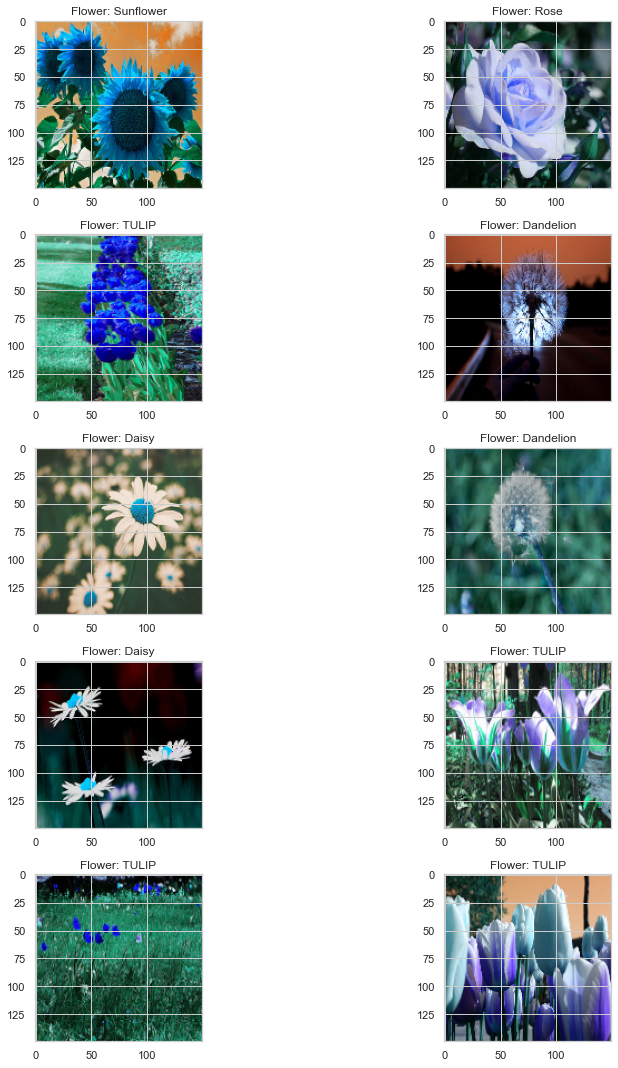

In [12]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
plt.tight_layout()
            


In [13]:
le=LabelEncoder()
Y=le.fit_transform(Z)
print(Y)
Y=to_categorical(Y,5)
print('second y',Y)
X=np.array(X)
print(X)
X=X/255
print(X)


[0 0 0 ... 1 1 1]
second y [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[[[134 136 136]
   [143 144 144]
   [147 147 147]
   ...
   [150 152 152]
   [152 154 154]
   [152 152 152]]

  [[132 134 134]
   [142 143 143]
   [146 146 146]
   ...
   [150 152 152]
   [151 153 153]
   [151 151 151]]

  [[131 134 134]
   [139 141 142]
   [145 144 146]
   ...
   [152 154 154]
   [150 151 151]
   [147 147 147]]

  ...

  [[ 26  47  44]
   [ 25  46  43]
   [ 26  47  44]
   ...
   [125 126 130]
   [124 125 129]
   [125 126 130]]

  [[ 26  47  44]
   [ 26  47  44]
   [ 27  48  45]
   ...
   [127 127 131]
   [125 126 130]
   [124 126 129]]

  [[ 26  47  44]
   [ 26  47  44]
   [ 27  48  45]
   ...
   [127 128 132]
   [126 127 131]
   [126 127 131]]]


 [[[224 216 215]
   [220 213 209]
   [226 217 214]
   ...
   [ 14   9   9]
   [ 17  11  12]
   [ 12   7   8]]

  [[225 217 216]
   [231 223 221]
   [224 216 215]
   ...
   [ 15  12  13

In [14]:
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [15]:
X

array([[[[0.5254902 , 0.53333333, 0.53333333],
         [0.56078431, 0.56470588, 0.56470588],
         [0.57647059, 0.57647059, 0.57647059],
         ...,
         [0.58823529, 0.59607843, 0.59607843],
         [0.59607843, 0.60392157, 0.60392157],
         [0.59607843, 0.59607843, 0.59607843]],

        [[0.51764706, 0.5254902 , 0.5254902 ],
         [0.55686275, 0.56078431, 0.56078431],
         [0.57254902, 0.57254902, 0.57254902],
         ...,
         [0.58823529, 0.59607843, 0.59607843],
         [0.59215686, 0.6       , 0.6       ],
         [0.59215686, 0.59215686, 0.59215686]],

        [[0.51372549, 0.5254902 , 0.5254902 ],
         [0.54509804, 0.55294118, 0.55686275],
         [0.56862745, 0.56470588, 0.57254902],
         ...,
         [0.59607843, 0.60392157, 0.60392157],
         [0.58823529, 0.59215686, 0.59215686],
         [0.57647059, 0.57647059, 0.57647059]],

        ...,

        [[0.10196078, 0.18431373, 0.17254902],
         [0.09803922, 0.18039216, 0.16862745]

In [16]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:

np.random.seed(42)
rn.seed(42)
# tf.set_random_seed(42)

In [18]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [19]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [20]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [36]:
X

array([[[[0.5254902 , 0.53333333, 0.53333333],
         [0.56078431, 0.56470588, 0.56470588],
         [0.57647059, 0.57647059, 0.57647059],
         ...,
         [0.58823529, 0.59607843, 0.59607843],
         [0.59607843, 0.60392157, 0.60392157],
         [0.59607843, 0.59607843, 0.59607843]],

        [[0.51764706, 0.5254902 , 0.5254902 ],
         [0.55686275, 0.56078431, 0.56078431],
         [0.57254902, 0.57254902, 0.57254902],
         ...,
         [0.58823529, 0.59607843, 0.59607843],
         [0.59215686, 0.6       , 0.6       ],
         [0.59215686, 0.59215686, 0.59215686]],

        [[0.51372549, 0.5254902 , 0.5254902 ],
         [0.54509804, 0.55294118, 0.55686275],
         [0.56862745, 0.56470588, 0.57254902],
         ...,
         [0.59607843, 0.60392157, 0.60392157],
         [0.58823529, 0.59215686, 0.59215686],
         [0.57647059, 0.57647059, 0.57647059]],

        ...,

        [[0.10196078, 0.18431373, 0.17254902],
         [0.09803922, 0.18039216, 0.16862745]

In [23]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [25]:
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,y_test),verbose=2,steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/50
 - 17s - loss: 1.5565 - accuracy: 0.3056 - val_loss: 1.2704 - val_accuracy: 0.4287
Epoch 2/50
 - 12s - loss: 1.2371 - accuracy: 0.4632 - val_loss: 1.1317 - val_accuracy: 0.5333
Epoch 3/50
 - 11s - loss: 1.1582 - accuracy: 0.5159 - val_loss: 1.1023 - val_accuracy: 0.5333
Epoch 4/50
 - 11s - loss: 1.0788 - accuracy: 0.5587 - val_loss: 1.0180 - val_accuracy: 0.5657
Epoch 5/50
 - 11s - loss: 1.0180 - accuracy: 0.5922 - val_loss: 0.9186 - val_accuracy: 0.6417
Epoch 6/50
 - 11s - loss: 0.9803 - accuracy: 0.6209 - val_loss: 0.8798 - val_accuracy: 0.6546
Epoch 7/50
 - 12s - loss: 0.9141 - accuracy: 0.6381 - val_loss: 0.9390 - val_accuracy: 0.6167
Epoch 8/50
 - 11s - loss: 0.8835 - accuracy: 0.6521 - val_loss: 0.8248 - val_accuracy: 0.6639
Epoch 9/50
 - 11s - loss: 0.8690 - accuracy: 0.6597 - val_loss: 0.8980 - val_accuracy: 0.6380
Epoch 10/50
 - 11s - loss: 0.8259 - accuracy: 0.6841 - val_loss: 0.8116 - val_accuracy: 0.6806
Epoch 11/50
 - 11s - loss: 0.8008 - accuracy: 0.6922 - val_

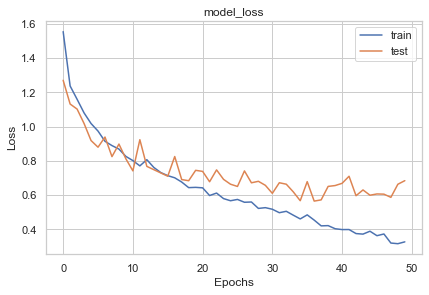

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

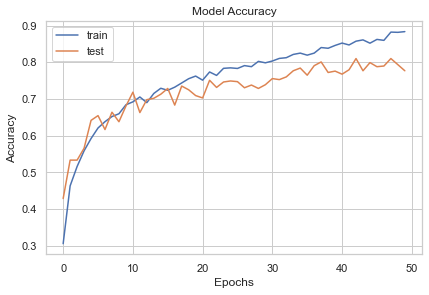

In [32]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [31]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [33]:
pred=model.predict(x_test)

In [35]:
pred_digits=np.argmax(pred,axis=1)

In [36]:
pred_digits

array([1, 2, 4, ..., 3, 3, 1], dtype=int64)

In [37]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i]==pred_digits[i])):
        prop_class.append(i)
    if(len(prop_class)==8):
        break
        
        

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break
        

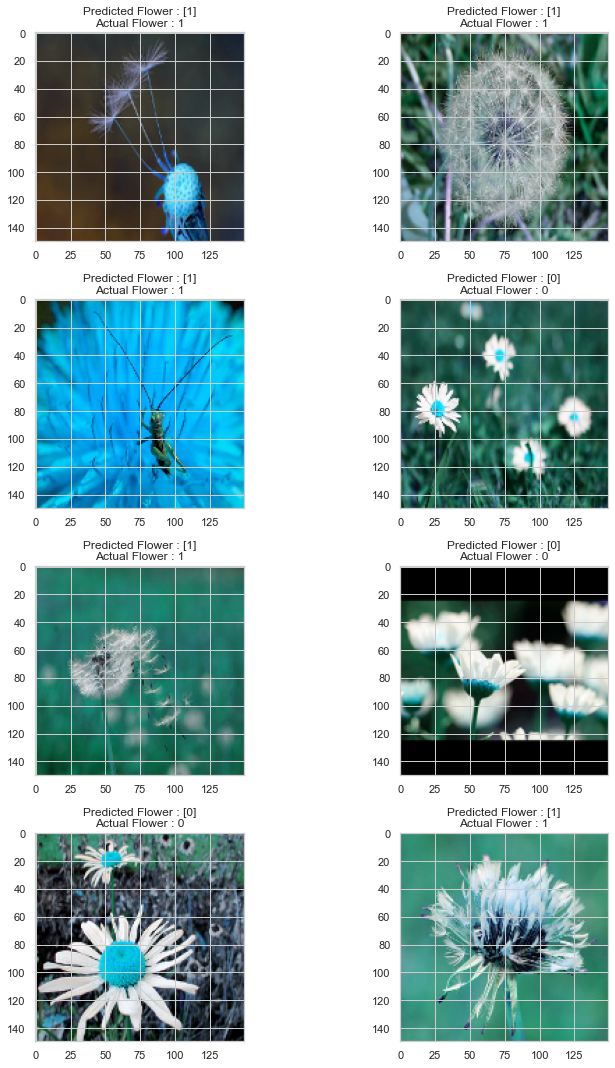

In [49]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str((np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

In [41]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [43]:
prop_class[0]

0

In [44]:
pred_digits

array([1, 2, 4, ..., 3, 3, 1], dtype=int64)

In [ ]:
np.argmax([y_test[prop_class[count]]])

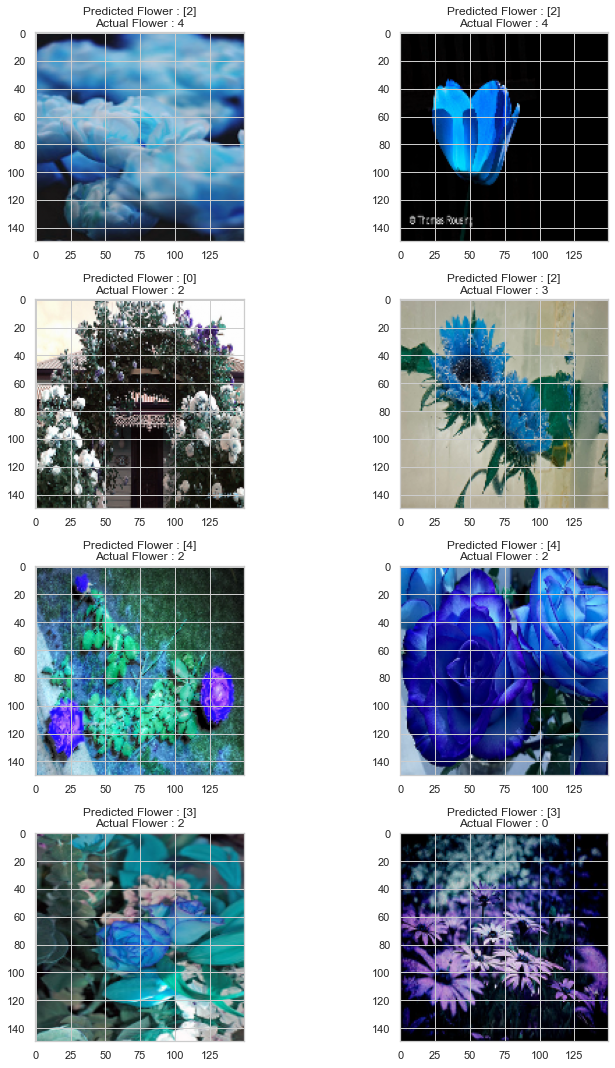

In [50]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str((np.argmax([y_test[mis_class[count]]]))))
        plt.tight_layout()
        count+=1


# The END